In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [9]:
df = pd.read_csv("Dataset/Mall_Customers.csv")

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Univariate  analysis

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


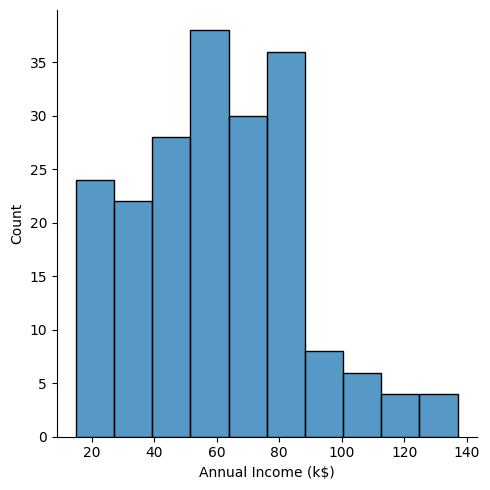

In [12]:
sns.displot(df['Annual Income (k$)'])

In [13]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

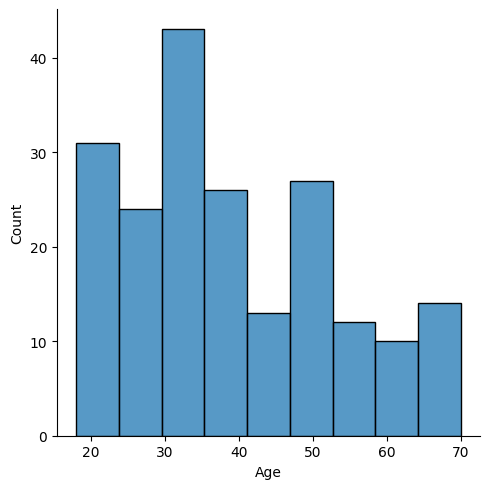

<Figure size 640x480 with 0 Axes>

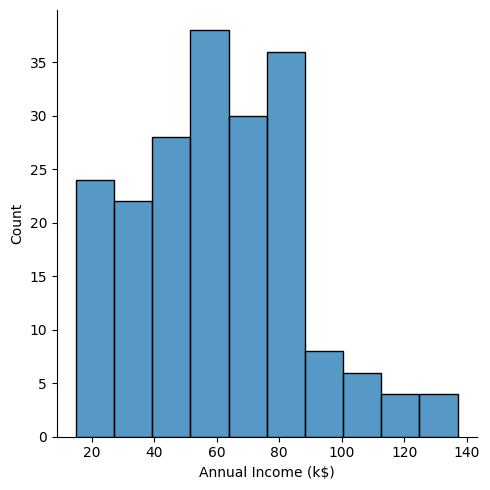

<Figure size 640x480 with 0 Axes>

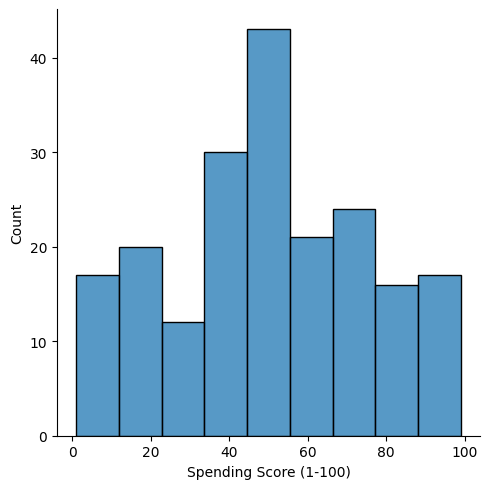

In [14]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.displot(df[i])

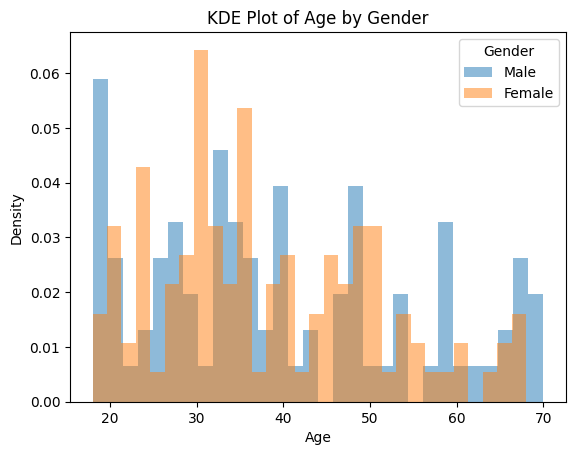

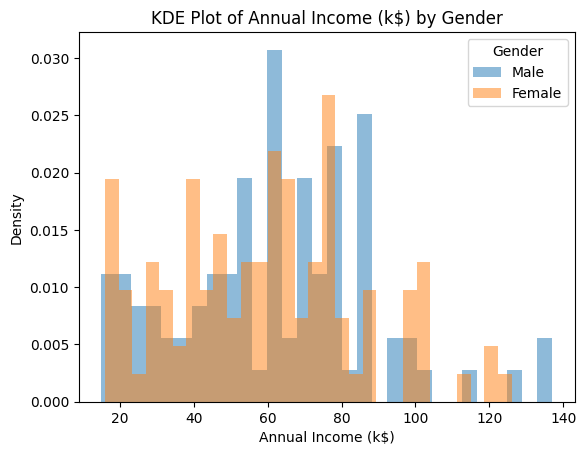

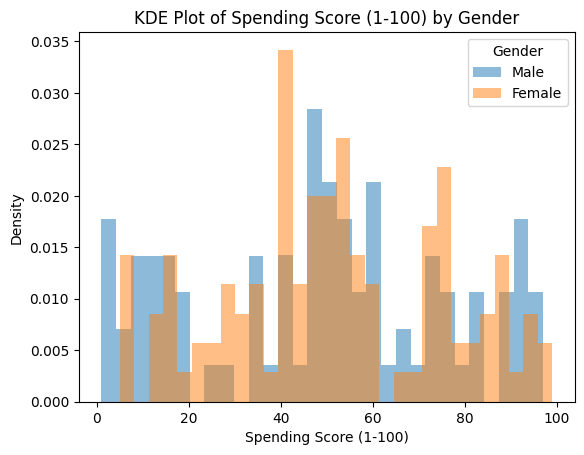

In [23]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in columns:
    plt.figure()
    for gender in df['Gender'].unique():
        subset = df[df['Gender'] == gender]
        plt.hist(subset[col], bins=30, alpha=0.5, density=True, label=gender)
    plt.title(f'KDE Plot of {col} by Gender')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='Gender')
    plt.show()

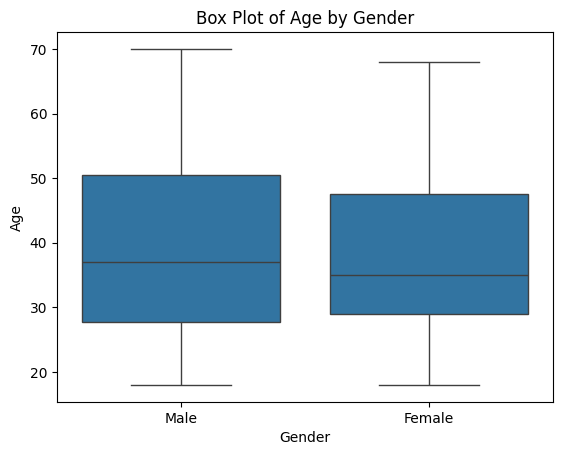

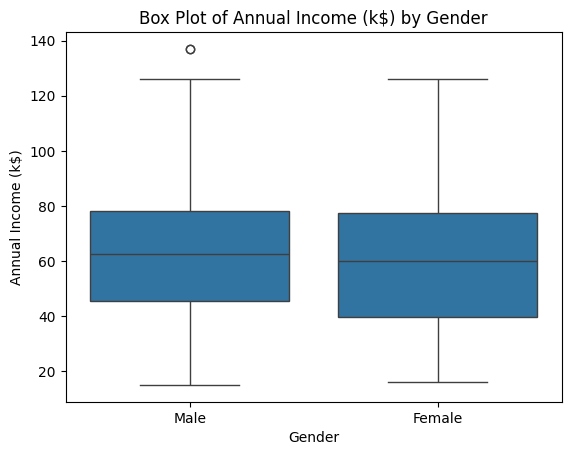

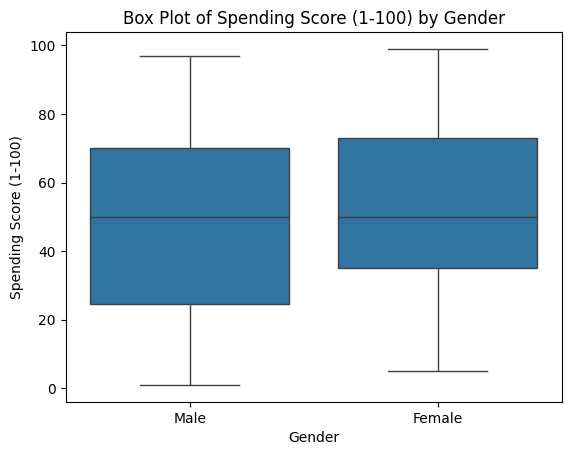

In [24]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in columns:
    plt.figure()
    sns.boxplot(x='Gender', y=col, data=df)
    plt.title(f'Box Plot of {col} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(col)
    plt.show()

In [26]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

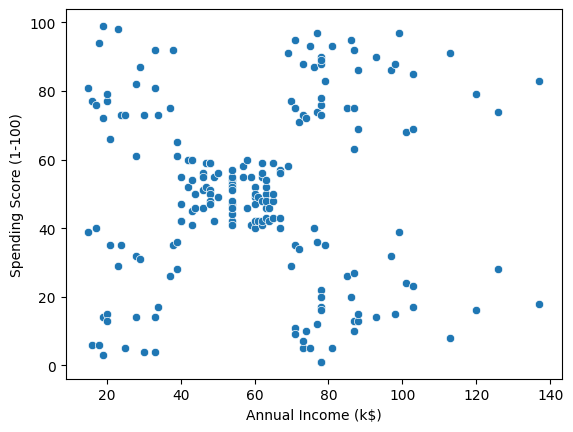

In [27]:
sns.scatterplot(data=df, x='Annual Income (k$)', y= 'Spending Score (1-100)')

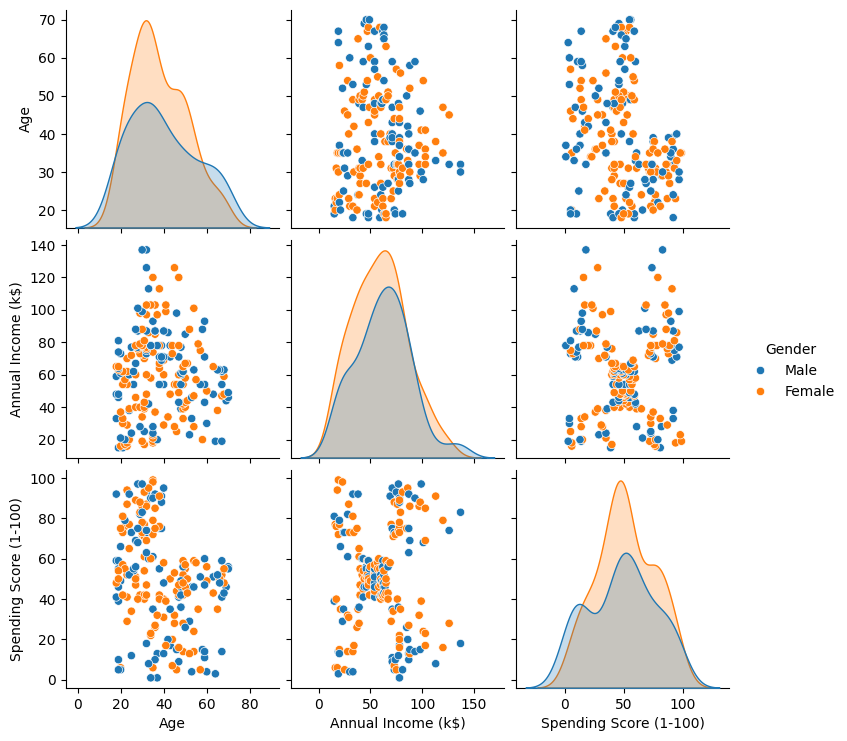

In [32]:
# Check if 'Customer ID' exists before dropping
df = df.drop('CustomerID', axis=1)

# Creating a pair plot
sns.pairplot(df, hue='Gender')
plt.show()

In [34]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


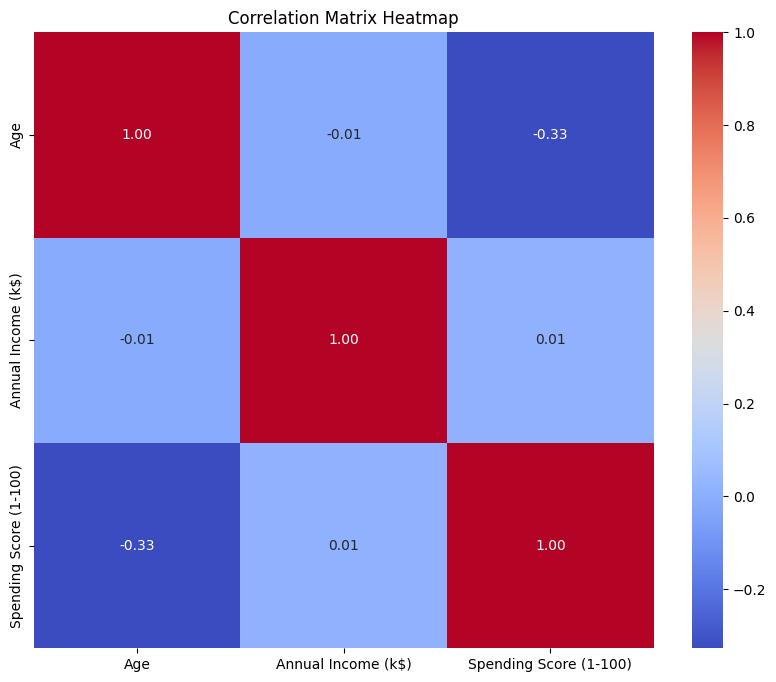

In [40]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Clustering - Univariate, Bivariate, Multivariate

In [47]:
clustering1= KMeans(n_clusters=6)

In [48]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [49]:
clustering1.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2,
       2, 2])

In [50]:
df['Income Cluster']= clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,4
3,Female,23,16,77,4
4,Female,31,17,40,4


In [51]:
df['Income Cluster'].value_counts()

Income Cluster
1    54
3    50
0    42
4    32
5    16
2     6
Name: count, dtype: int64

In [52]:
clustering1.inertia_

5443.6149735449735

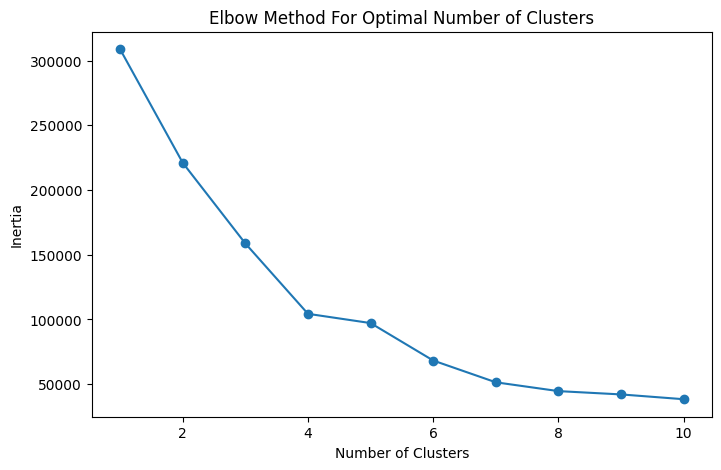

In [57]:
# Selecting relevant columns for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# List to store inertia scores
inertia_scores = []

# Calculating inertia for different numbers of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)

# Plotting the inertia scores
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [58]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [60]:
# Calculating mean values for each cluster
mean_values = df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Display the mean values
print(mean_values)

                      Age  Annual Income (k$)  Spending Score (1-100)
Income Cluster                                                       
0               43.000000           42.238095               50.666667
1               36.018519           78.370370               49.555556
2               36.833333          127.666667               49.666667
3               41.520000           60.440000               50.060000
4               34.906250           22.000000               49.656250
5               37.812500          100.875000               52.875000


Bivariate Clustering

In [65]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,4,0
1,Male,21,15,81,4,2
2,Female,20,16,6,4,0
3,Female,23,16,77,4,2
4,Female,31,17,40,4,0


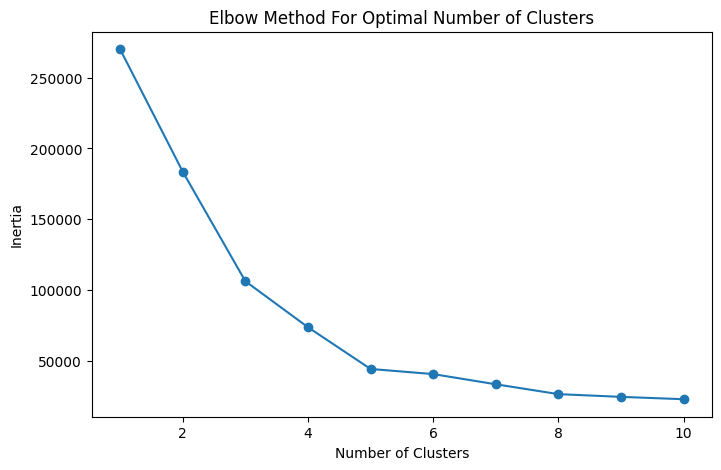

In [66]:
# Selecting relevant columns for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# List to store inertia scores
inertia_scores2 = []

# Calculating inertia for different numbers of clusters
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i, random_state=42)
    kmeans2.fit(X)
    inertia_scores2.append(kmeans2.inertia_)

# Plotting the inertia scores
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_scores2, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [71]:
centers= pd.DataFrame(clustering2.cluster_centers_)
centers.columns= ['x', 'y']

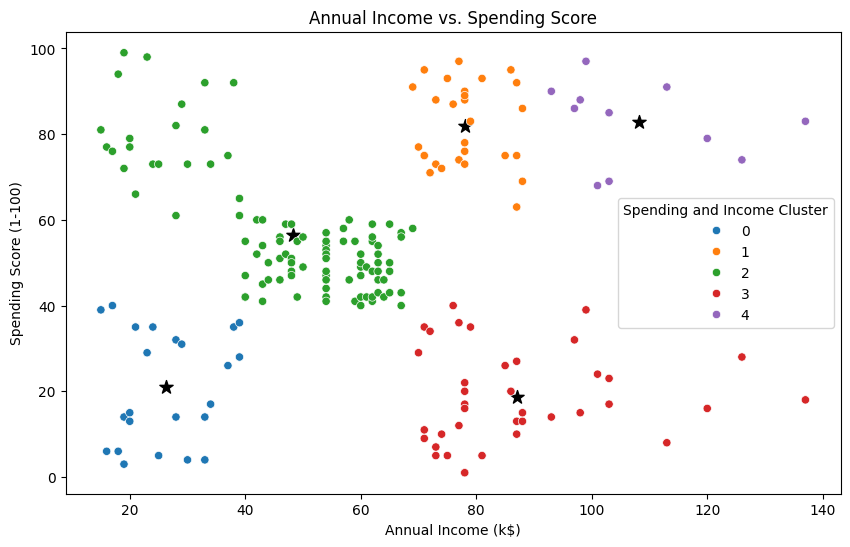

In [72]:
# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [74]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.535714,0.464286
2,0.590000,0.410000
3,0.473684,0.526316
4,0.545455,0.454545


In [77]:
# Calculating mean values for each cluster
mean_values = df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Display the mean values
print(mean_values)

                                   Age  Annual Income (k$)  \
Spending and Income Cluster                                  
0                            45.217391           26.304348   
1                            32.785714           78.035714   
2                            39.200000           48.260000   
3                            40.394737           87.000000   
4                            32.454545          108.181818   

                             Spending Score (1-100)  
Spending and Income Cluster                          
0                                         20.913043  
1                                         81.892857  
2                                         56.480000  
3                                         18.631579  
4                                         82.727273  


Multivariate Cluster

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scale = StandardScaler()

In [80]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,4,0
1,Male,21,15,81,4,2
2,Female,20,16,6,4,0
3,Female,23,16,77,4,2
4,Female,31,17,40,4,0


In [82]:
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,4,0,True
1,21,15,81,4,2,True
2,20,16,6,4,0,False
3,23,16,77,4,2,False
4,31,17,40,4,0,False


In [83]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [85]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [86]:
dff = scale.fit_transform(dff)

In [88]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


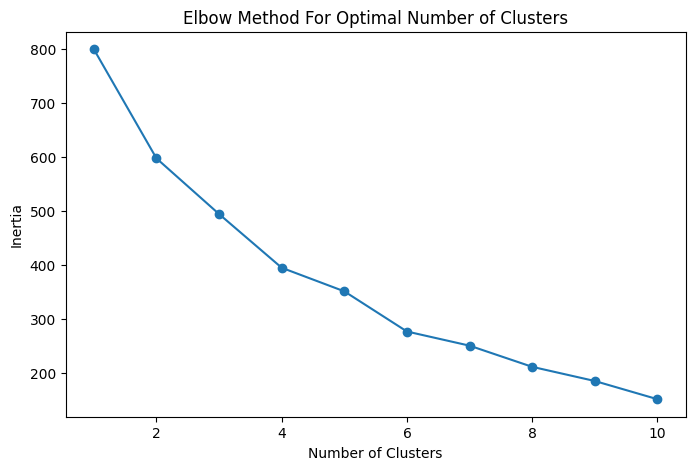

In [89]:
# List to store inertia scores
inertia_scores3 = []

# Calculating inertia for different numbers of clusters
for i in range(1, 11):
    kmeans3 = KMeans(n_clusters=i, random_state=42)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)

# Plotting the inertia scores
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_scores3, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [90]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,4,0
1,Male,21,15,81,4,2
2,Female,20,16,6,4,0
3,Female,23,16,77,4,2
4,Female,31,17,40,4,0
...,...,...,...,...,...,...
195,Female,35,120,79,2,4
196,Female,45,126,28,2,3
197,Male,32,126,74,2,4
198,Male,32,137,18,2,3


In [91]:
df.to_csv('Clustering.csv')